**Import Required Libraries**

In [151]:
import pandas as pd

In [152]:
df = pd.read_csv(r"G:\B.E\TE VI\DSBDA\airquality.csv")

In [153]:
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,medium
2,3,12.0,149.0,12.6,74,5,3,low
3,4,18.0,313.0,11.5,62,5,4,medium
4,5,NaN,NaN,14.3,56,5,5,low
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,low
149,150,NaN,145.0,13.2,77,9,27,NaN
150,151,14.0,191.0,14.3,75,9,28,low
151,152,18.0,131.0,8.0,76,9,29,NaN


In [154]:
df.columns

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day',
       'Humidity'],
      dtype='object')

**Drop Unwanted columns**

In [155]:
df=df.drop(columns='Unnamed: 0')

In [156]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.0,190.0,7.4,67,5,1,high
1,36.0,118.0,8.0,72,5,2,medium
2,12.0,149.0,12.6,74,5,3,low
3,18.0,313.0,11.5,62,5,4,medium
4,NaN,NaN,14.3,56,5,5,low
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,low
149,NaN,145.0,13.2,77,9,27,NaN
150,14.0,191.0,14.3,75,9,28,low
151,18.0,131.0,8.0,76,9,29,NaN


**Check for no. of null values present**

In [157]:
df.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
Humidity    72
dtype: int64

**Data Cleaning**

In [158]:
df['Ozone']=df['Ozone'].fillna(df['Ozone'].mean())

In [159]:
df['Solar.R']=df['Solar.R'].fillna(df['Solar.R'].mean())

In [160]:
df['Humidity']=df['Humidity'].fillna(df['Humidity'].mode()[0])

In [161]:
df.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

In [162]:
from sklearn import preprocessing

In [163]:
df['Humidity']=preprocessing.LabelEncoder().fit_transform(df['Humidity'])

In [164]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,1
1,36.00000,118.000000,8.0,72,5,2,3
2,12.00000,149.000000,12.6,74,5,3,2
3,18.00000,313.000000,11.5,62,5,4,3
4,42.12931,185.931507,14.3,56,5,5,2
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,2
149,42.12931,145.000000,13.2,77,9,27,2
150,14.00000,191.000000,14.3,75,9,28,2
151,18.00000,131.000000,8.0,76,9,29,2


**1. PIE Chart**

In [165]:
import matplotlib.pyplot as plt

In [166]:
labels= 'Ozone', 'Solar.R', 'Wind', 'Temp'

In [167]:
sizes=[df['Ozone'].mean(),df['Solar.R'].mean(),df['Wind'].mean(),df['Temp'].mean()]

In [168]:
colors=['Red','Blue','Green','Yellow']

In [169]:
explode = (0.1, 0, 0, 0)

Text(0.5, 1.0, 'Average data')

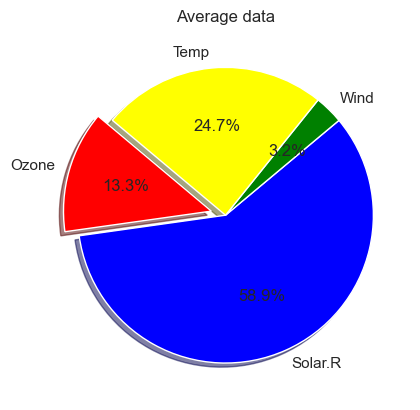

In [170]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Average data')

**2. BAR Plot**

In [171]:
import numpy as np

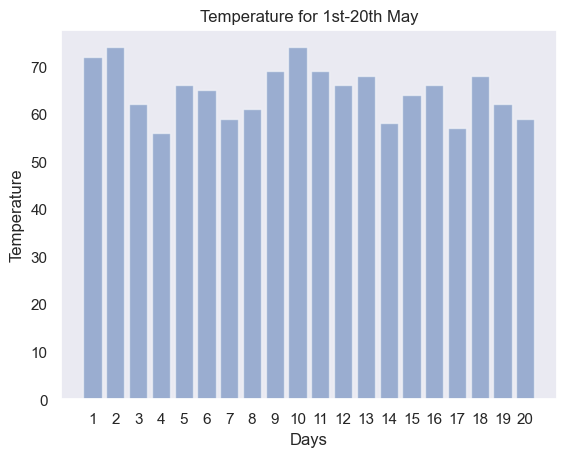

In [172]:
h = df.iloc[1:21,3]
y_pos = np.arange(len(h)) 
v = range(1,21)
plt.bar(y_pos,h,align = 'center', alpha = 0.5)
plt.xticks(y_pos,v)
plt.ylabel('Temperature')
plt.xlabel("Days")
plt.title('Temperature for 1st-20th May')
plt.show()


**3. HISTOGRAM**

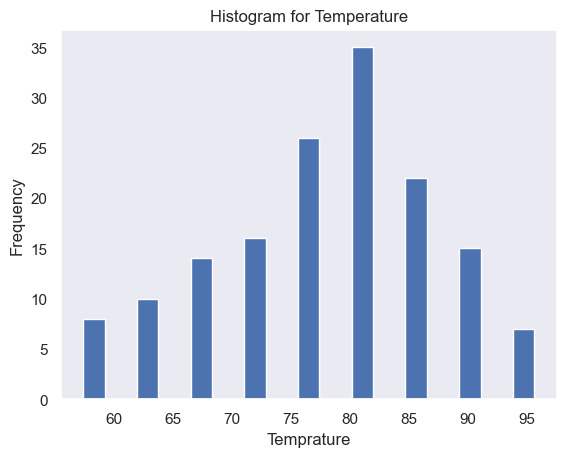

In [173]:
e=df.iloc[:,3]
plt.hist(e,bins='auto', rwidth=0.4)
plt.title("Histogram for Temperature")
plt.xlabel("Temprature")
plt.ylabel("Frequency")
plt.show()

**4. LINE Graph**

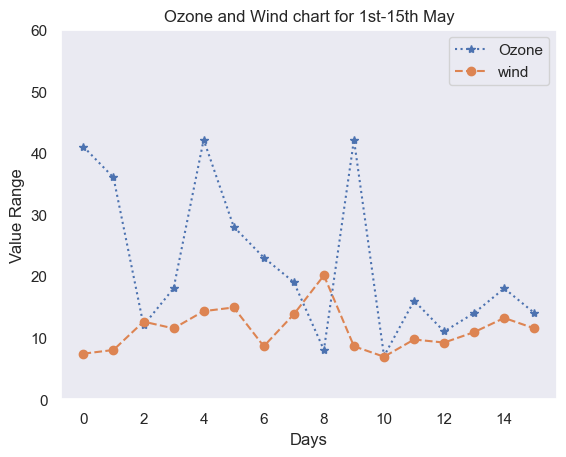

In [174]:
l=df.iloc[:16,0]
m=df.iloc[:16,2]
plt.plot(l,label="Ozone",marker = '*',linestyle = "dotted") 
plt.plot(m,label = 'wind',marker = 'o',linestyle = "dashed") 
plt.ylim(0,60)
plt.legend()
plt.title("Ozone and Wind chart for 1st-15th May") 
plt.ylabel("Value Range")
plt.xlabel("Days") 
plt.savefig("plot5.png")

**5. SCATTER Plot**

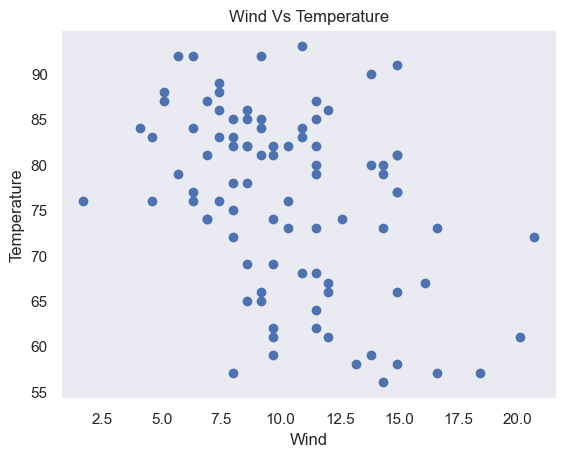

In [175]:
    s=df.iloc[1:91,2]
    t=df.iloc[1:91,3]
    plt.scatter(s,t)
    plt.title("Wind Vs Temperature")
    plt.xlabel("Wind")
    plt.ylabel("Temperature")
    plt.show()

**6. BOX Plot**

<Axes: title={'center': 'Temp'}, xlabel='Month'>

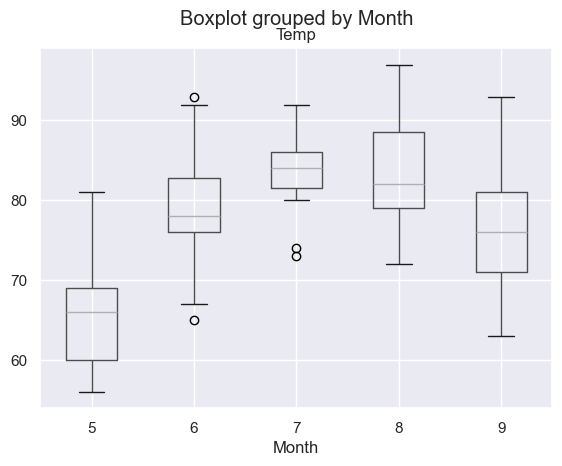

In [176]:
df.boxplot(by='Month',column=['Temp'])

**7. PAIR Plot**

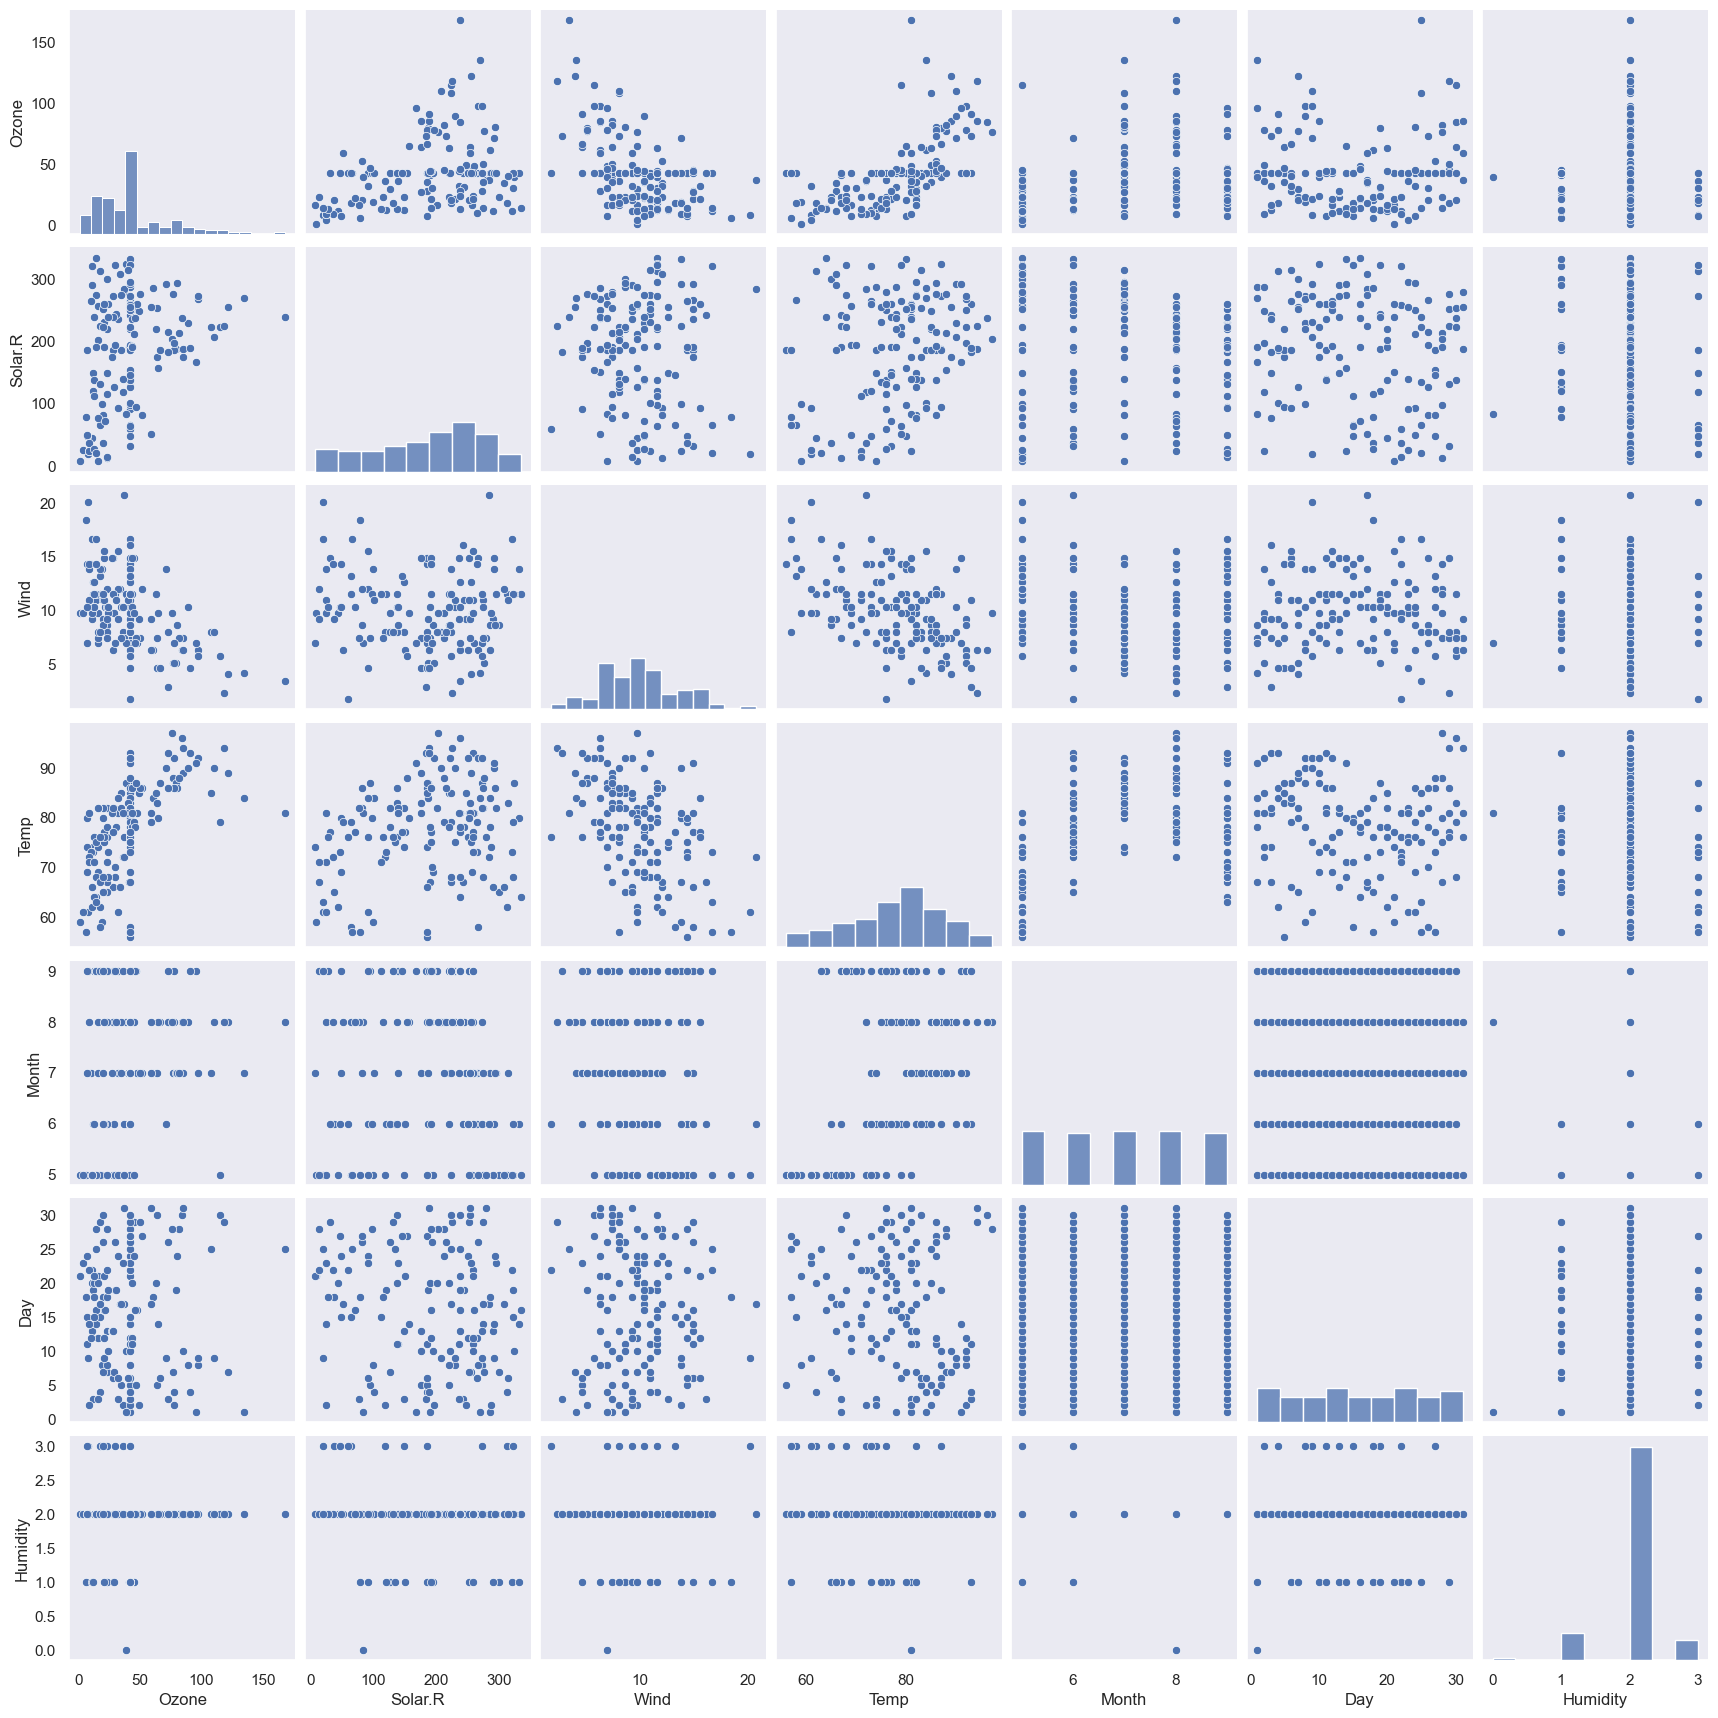

In [177]:
import seaborn as sns
sns.pairplot(df) 
plt.show()

**8. HEATMAP**

<Axes: >

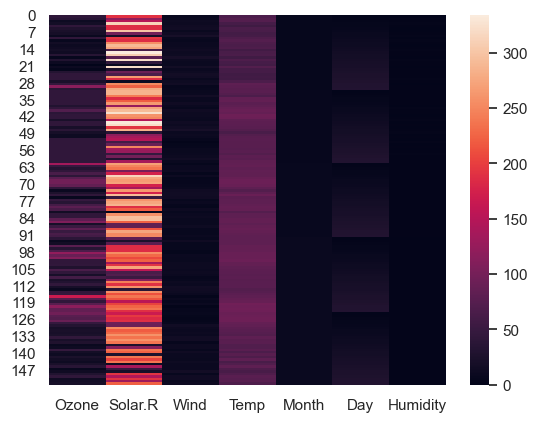

In [178]:
sns.heatmap(df)

**9. BAR Plot with Values top of each bar**

**10. Word Cloud**

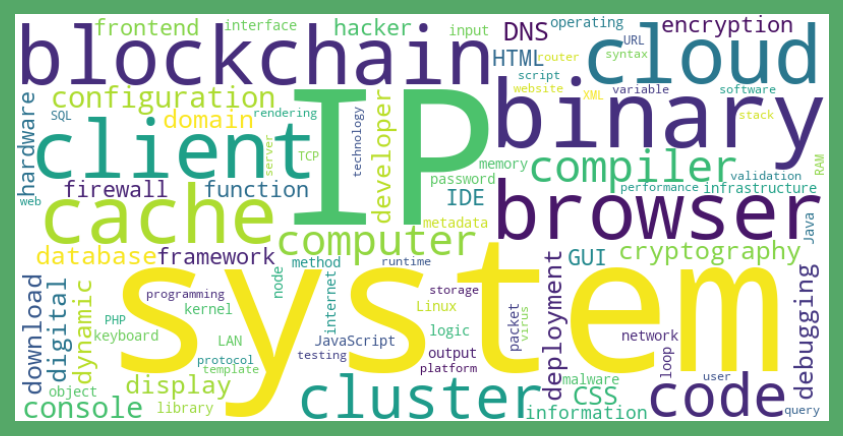

In [179]:
from wordcloud import WordCloud
with open('words.txt', 'r') as file:
    text = file.read()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(7, 5), dpi=150, facecolor='g')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()